In [1]:
import mne
ant_filename= '/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC001/ses-01/eeg/sub-HC001_ses-01_task-ant_desc-reviewed_eeg.fif'
rest_filename= '/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC001/ses-01/eeg/sub-HC001_ses-01_task-rest_desc-reviewed_eeg.fif'
raw = mne.io.read_raw_fif(ant_filename, preload=True)

Opening raw data file /Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC001/ses-01/eeg/sub-HC001_ses-01_task-ant_desc-reviewed_eeg.fif...
    Range : 37374 ... 346067 =    149.496 ...  1384.268 secs
Ready.
Reading 0 ... 308693  =      0.000 ...  1234.772 secs...


In [68]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
def avg_fft_calculation(signal):
    avg_fft = []
    for channel in range(signal.shape[0]):
        fft = abs(scipy.fft.fft(np.squeeze(signal[channel,:])))
        fft = fft[:len(fft)//2]
        avg_fft.append(np.mean(fft))
    
    return avg_fft

def rms_calculation(signal):
    rms = []
    for channel in range(signal.shape[0]):
        rms.append(np.sqrt(np.mean(signal[channel,:]**2)))
    return rms

def max_gradient_calculation(signal, sampling_rate=1000):
    """Calculate the maximum gradient of the signal
    Largest difference between samples within the signal
    Threshold is usually 10uV/ms

    Args:
        signal (_type_): _description_

    Returns:
        list of bool: _d
    """
    if sampling_rate <= 1000:
        samples = 1
    else:
        samples = int(sampling_rate/1000)
    max_gradient = []
    for channel in range(signal.shape[0]):
        max_gradient.append(np.max(np.diff(signal[channel,:], n=samples)))
    return max_gradient

def kurtosis_calculation(signal):
    kurtosis = []
    for channel in range(signal.shape[0]):
        kurtosis.append(scipy.stats.kurtosis(signal[channel,:]))
    return kurtosis

def zero_crossing_calculation(signal):
    zero_crossing = []
    for channel in range(signal.shape[0]):
        zero_crossing.append(np.sum(np.abs(np.diff(np.sign(signal[channel,:])))==2))
    return zero_crossing

def hjorth_parameters(signal):
    activity = np.var(signal, axis=1)
    mobility = np.sqrt(np.var(np.diff(signal, axis=1), axis=1)/activity)
    complexity = np.sqrt(np.var(np.diff(np.diff(signal, axis=1), axis=1), axis=1)/np.var(np.diff(signal, axis=1), axis=1))
    return activity, mobility, complexity


In [7]:
import mne_bids

subjects = ['HC008',
            'HC009',
            'HC070']
big_raw = []
for subject in subjects:
    bids_path = mne_bids.BIDSPath(subject=subject, 
                                  session='01', 
                                  task='ant', 
                                  suffix='eeg',
                                  datatype='eeg',
                                  description='reviewed',
                                  root='/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed')
    raw = mne_bids.read_raw_bids(bids_path)
    raw.plot(block=True)
    ica = mne.preprocessing.ICA(random_state=97, method='oas')
    ica.fit(raw)
    ica.plot_sources(raw, block=True)
    ica.apply(raw)
    big_raw.append(raw)

big_raw = mne.concatenate_raws(big_raw)

Opening raw data file /Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC008/ses-01/eeg/sub-HC008_ses-01_task-ant_desc-reviewed_eeg.fif...
    Range : 40152 ... 348776 =    160.608 ...  1395.104 secs
Ready.


/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any events.tsv associated with sub-HC008_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC008/**/eeg/sub-HC008_ses-01*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any channels.tsv associated with sub-HC008_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC008/**/eeg/sub-HC008_ses-01*channels.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any eeg.json associated with sub-HC008_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/

Using qt as 2D backend.
Using pyopengl with version 3.1.6
Channels marked as bad:
['E126']
Opening raw data file /Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC009/ses-01/eeg/sub-HC009_ses-01_task-ant_desc-reviewed_eeg.fif...
    Range : 34396 ... 343099 =    137.584 ...  1372.396 secs
Ready.
Using pyopengl with version 3.1.6


/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any events.tsv associated with sub-HC009_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC009/**/eeg/sub-HC009_ses-01*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any channels.tsv associated with sub-HC009_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC009/**/eeg/sub-HC009_ses-01*channels.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any eeg.json associated with sub-HC009_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/

Channels marked as bad:
none
Opening raw data file /Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC042/ses-01/eeg/sub-HC042_ses-01_task-ant_desc-reviewed_eeg.fif...
    Range : 160839 ... 470733 =    643.356 ...  1882.932 secs
Ready.


/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any events.tsv associated with sub-HC042_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC042/**/eeg/sub-HC042_ses-01*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any channels.tsv associated with sub-HC042_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC042/**/eeg/sub-HC042_ses-01*channels.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any eeg.json associated with sub-HC042_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/

Using pyopengl with version 3.1.6
Channels marked as bad:
none
Opening raw data file /Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC070/ses-01/eeg/sub-HC070_ses-01_task-ant_desc-reviewed_eeg.fif...
    Range : 167660 ... 483474 =    670.640 ...  1933.896 secs
Ready.


/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any events.tsv associated with sub-HC070_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC070/**/eeg/sub-HC070_ses-01*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any channels.tsv associated with sub-HC070_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/sub-HC070/**/eeg/sub-HC070_ses-01*channels.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_15789/1052215721.py:15: RuntimeWarning: Did not find any eeg.json associated with sub-HC070_ses-01_task-ant_desc-reviewed.

The search_str was "/Volumes/portable_data/proj-adult_TBI_attention/derivatives/reviewed/

Using pyopengl with version 3.1.6
Channels marked as bad:
['E128']


In [94]:
from tqdm import tqdm
import numpy as np

def run_qa(raw):
    sampling_rate = raw.info['sfreq']
    n_samples = raw.n_times
    n_chans_original = raw.info['nchan']
    eeg_data = raw.get_data()
    win_length_secs = 1

    win_size = int(win_length_secs * sampling_rate)
    win_offsets = np.arange(1, (n_samples - win_size), win_size)
    win_count = len(win_offsets)
    # Initialize per-window arrays for each type of noise info calculated below
    avg_fft = np.zeros((win_count, n_chans_original))
    rms = np.zeros((win_count, n_chans_original))
    max_gradient = np.zeros((win_count, n_chans_original))
    kurtosis = np.zeros((win_count, n_chans_original))
    zero_crossing = np.zeros((win_count, n_chans_original))
    standard_deviation = np.zeros((win_count, n_chans_original))
    hjorth_activity = np.zeros((win_count, n_chans_original))
    hjorth_mobility = np.zeros((win_count, n_chans_original))
    hjorth_complexity = np.zeros((win_count, n_chans_original))
    # Progress bar
    for w in tqdm(range(win_count)):
        # Get both filtered and unfiltered data for the current window
        start, end = (w * win_size, (w + 1) * win_size)
        eeg_raw = eeg_data[:, start:end]

        avg_fft[w, :] = avg_fft_calculation(eeg_raw)
        rms[w, :] = rms_calculation(eeg_raw)
        max_gradient[w, :] = max_gradient_calculation(eeg_raw)
        kurtosis[w, :] = kurtosis_calculation(eeg_raw)
        zero_crossing[w, :] = zero_crossing_calculation(eeg_raw)
        hjorth_activity[w,:], hjorth_mobility[w,:], hjorth_complexity[w,:] = hjorth_parameters(eeg_raw)
    
    a_avg_fft = np.mean(avg_fft, axis=0)
    a_rms = np.mean(rms, axis=0)
    a_max_gradient = np.mean(max_gradient, axis=0)
    a_kurtosis = np.mean(kurtosis, axis=0)
    a_zero_crossing = np.mean(zero_crossing, axis=0)
    a_hjorth_activity = np.mean(hjorth_activity, axis=0)
    a_hjorth_mobility = np.mean(hjorth_mobility, axis=0)
    a_hjorth_complexity = np.mean(hjorth_complexity, axis=0)
    
    sd_avg_fft = np.std(avg_fft, axis=0)
    sd_rms = np.std(rms, axis=0)
    sd_max_gradient = np.std(max_gradient, axis=0)
    sd_kurtosis = np.std(kurtosis, axis=0)
    sd_zero_crossing = np.std(zero_crossing, axis=0)
    sd_hjorth_activity = np.std(hjorth_activity, axis=0)
    sd_hjorth_mobility = np.std(hjorth_mobility, axis=0)
    sd_hjorth_complexity = np.std(hjorth_complexity, axis=0)
    
    d = {
        'average_fft': {
            'mean': a_avg_fft,
            'std': sd_avg_fft
        },
        'rms': {
            'mean': a_rms,
            'std': sd_rms
        },
        'max_gradient': {
            'mean': a_max_gradient,
            'std': sd_max_gradient
        },
        'kurtosis': {
            'mean': a_kurtosis,
            'std': sd_kurtosis
        },
        'zero_crossing': {
            'mean': a_zero_crossing,
            'std': sd_zero_crossing
        },
        'hjorth_activity': {
            'mean': a_hjorth_activity,
            'std': sd_hjorth_activity
        },
        'hjorth_mobility': {
            'mean': a_hjorth_mobility,
            'std': sd_hjorth_mobility
        },
        'hjorth_complexity': {
            'mean': a_hjorth_complexity,
            'std': sd_hjorth_complexity
        }
        
    }
    
    return d


100%|██████████| 1234/1234 [00:24<00:00, 49.51it/s]


In [18]:
import pickle
with open('/Users/samuel/codes/eeg_fmri/statisticsHC008.pickle', 'rb') as f:
    d = pickle.load(f)

In [42]:
import mne

# Create the standard sensor layout for GSN-HydroCel-129
montage_gsn = mne.channels.make_standard_montage('GSN-HydroCel-129')

# Create the standard sensor layout for standard_1020
montage_1020 = mne.channels.make_standard_montage('standard_1020')

# Get the electrode coordinates for GSN-HydroCel-129
coords_gsn = montage_gsn.get_positions()

# Get the electrode coordinates for standard_1020
coords_1020 = montage_1020.get_positions()

# Find the common electrodes based on coordinates
common_electrodes = []
for electrode in coords_gsn:
    if electrode in coords_1020:
        common_electrodes.append(electrode)

# Print the common electrodes
print(common_electrodes)



['ch_pos', 'coord_frame', 'nasion', 'lpa', 'rpa', 'hsp', 'hpi']


array([ 0.0116943 , -0.02894021, -0.00607222], dtype=float32)

In [23]:
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'easycap-M43',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


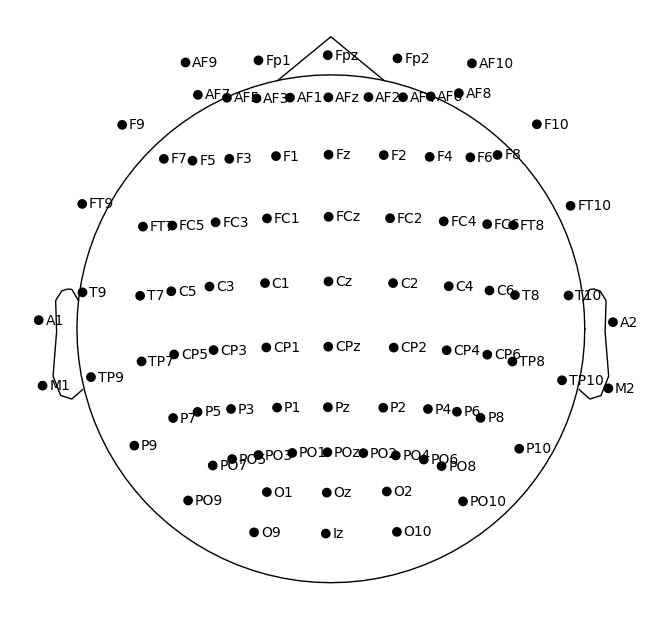

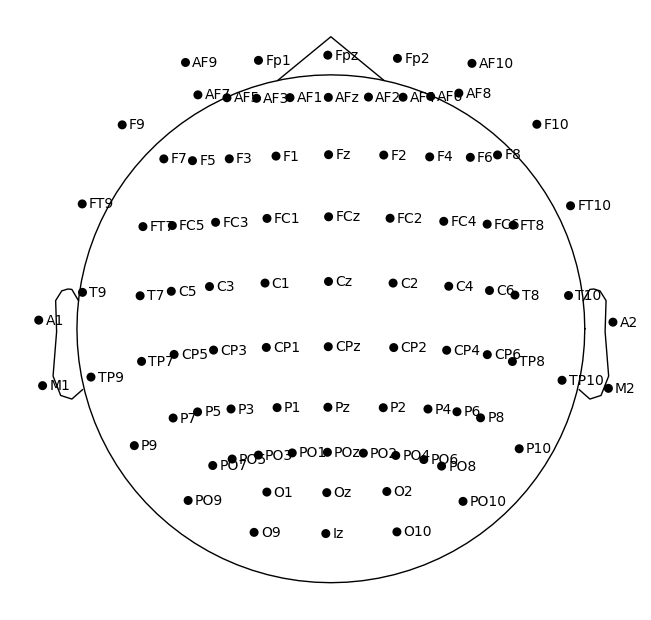

In [21]:
import mne
# Create a standard sensor layout
montage = mne.channels.make_standard_montage('standard_1020')

# Plot the sensor layout
montage.plot()

montage = mne.channels.make_standard_montage('e')


In [85]:
sampling_rate = 3000
time = np.linspace(0, 3, 3 * sampling_rate)
freq = 3
amplitude = 10
signal = amplitude * np.sin(2 * np.pi * freq * time)
noise = np.random.normal(0, 1, 3 * sampling_rate)*100
noisy_signal = signal + noise
fft_signal = abs(scipy.fft.fft(signal))[:len(signal)//2]
fft_noise = abs(scipy.fft.fft(noise))[:len(noise)//2]
fft_noisy_signal = abs(scipy.fft.fft(noisy_signal))[:len(noisy_signal)//2]
frequencies = scipy.fft.fftfreq(len(signal), 1/sampling_rate)[:len(signal)//2]

#plot signal and noise
plt.subplot(3,2,1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.subplot(3,2,3)
plt.plot(time, noise)
plt.title('Noise')
plt.subplot(3,2,5)
plt.plot(time, noisy_signal)
plt.title('Noisy Signal')
plt.subplot(3,2,2)
plt.plot(frequencies, fft_signal)
plt.xlim(0, 30)
plt.title('FFT of Original Signal')
plt.subplot(3,2,4)
plt.plot(frequencies, fft_noise)
plt.xlim(0, 30)
plt.title('FFT of Noise')
plt.subplot(3,2,6)
plt.plot(frequencies, fft_noisy_signal)
plt.xlim(0, 30)
plt.title('FFT of Noisy Signal')
signal_amplitude = np.max(fft_noisy_signal[np.where(frequencies==3)[0][0]])
noise_amplitude = np.mean(fft_noisy_signal[np.where(frequencies==3)[0][0]-5:np.where(frequencies==3)[0][0]+5])
snr = 10*np.log10(signal_amplitude/noise_amplitude)
print(f"signal: {signal_amplitude}")
print(f"noise: {noise_amplitude}")
print(f"snr pure: {signal_amplitude/noise_amplitude}")
print(f"snr: {snr}")

signal: 43743.08280031845
noise: 12265.403732883799
snr pure: 3.5663793669540897
snr: 5.52227538562165


# Generate simulated signal

In [104]:
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne import Epochs, compute_covariance, find_events, make_ad_hoc_cov
from mne.datasets import sample
from mne.simulation import (
    add_ecg,
    add_eog,
    add_noise,
    simulate_raw,
    simulate_sparse_stc,
)
print(__doc__)

data_path = sample.data_path()
meg_path = data_path / "MEG" / "sample"
raw_fname = meg_path / "sample_audvis_raw.fif"
fwd_fname = meg_path / "sample_audvis-meg-eeg-oct-6-fwd.fif"

# Load real data as the template
raw = mne.io.read_raw_fif(raw_fname)
raw.set_eeg_reference(projection=True)

Automatically created module for IPython interactive environment
Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 3.81TB/s]
Untarring contents of '/Users/samuel/mne_data/MNE-sample-data-processed.tar.gz' to '/Users/samuel/mne_data'


Download complete in 39s (1576.2 MB)
Opening raw data file /Users/samuel/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


In [103]:
n_dipoles = 4  # number of dipoles to create
epoch_duration = 2.0  # duration of each epoch/event
n = 0  # harmonic number
rng = np.random.RandomState(0)  # random state (make reproducible)

def data_fun(times):
    """Generate time-staggered sinusoids at harmonics of 10Hz."""
    global n
    n_samp = len(times)
    window = np.zeros(n_samp)
    start, stop = [
        int(ii * float(n_samp) / (2 * n_dipoles)) for ii in (2 * n, 2 * n + 1)
    ]
    window[start:stop] = 1.0
    n += 1
    data = 25e-9 * np.sin(2.0 * np.pi * 10.0 * n * times)
    data *= window
    return data


times = raw.times[: int(raw.info["sfreq"] * epoch_duration)]
fwd = mne.read_forward_solution(fwd_fname)
src = fwd["src"]
stc = simulate_sparse_stc(
    src, n_dipoles=n_dipoles, times=times, data_fun=data_fun, random_state=rng
)
# look at our source data
fig, ax = plt.subplots(1)
ax.plot(times, 1e9 * stc.data.T)
ax.set(ylabel="Amplitude (nAm)", xlabel="Time (s)")
mne.viz.utils.plt_show()

ValueError: src must be a string or instance of SourceSpaces, got None (type <class 'NoneType'>)

In [ ]:
raw_sim = simulate_raw(raw.info, [stc] * 10, forward=fwd, verbose=True)
cov = make_ad_hoc_cov(raw_sim.info)
add_noise(raw_sim, cov, iir_filter=[0.2, -0.2, 0.04], random_state=rng)
add_ecg(raw_sim, random_state=rng)
add_eog(raw_sim, random_state=rng)
raw_sim.plot()

In [ ]:

sampling_rate = 3000
time = np.linspace(0, 3, 3 * sampling_rate)
freq = 3
amplitude = 10
signal = [amplitude * np.sin(2 * np.pi * freq * time)
noise = np.random.normal(0, 1, 3 * sampling_rate)*100
noisy_signal = signal + noise
fft_signal = abs(scipy.fft.fft(signal))[:len(signal)//2]
fft_noise = abs(scipy.fft.fft(noise))[:len(noise)//2]
fft_noisy_signal = abs(scipy.fft.fft(noisy_signal))[:len(noisy_signal)//2]
frequencies = scipy.fft.fftfreq(len(signal), 1/sampling_rate)[:len(signal)//2]

#plot signal and noise
plt.subplot(3,2,1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.subplot(3,2,3)
plt.plot(time, noise)
plt.title('Noise')
plt.subplot(3,2,5)
plt.plot(time, noisy_signal)
plt.title('Noisy Signal')
plt.subplot(3,2,2)
plt.plot(frequencies, fft_signal)
plt.xlim(0, 30)
plt.title('FFT of Original Signal')
plt.subplot(3,2,4)
plt.plot(frequencies, fft_noise)
plt.xlim(0, 30)
plt.title('FFT of Noise')
plt.subplot(3,2,6)
plt.plot(frequencies, fft_noisy_signal)
plt.xlim(0, 30)
plt.title('FFT of Noisy Signal')
signal_amplitude = np.max(fft_noisy_signal[np.where(frequencies==3)[0][0]])
noise_amplitude = np.mean(fft_noisy_signal[np.where(frequencies==3)[0][0]-5:np.where(frequencies==3)[0][0]+5])
snr = 10*np.log10(signal_amplitude/noise_amplitude)
print(f"signal: {signal_amplitude}")
print(f"noise: {noise_amplitude}")
print(f"snr pure: {signal_amplitude/noise_amplitude}")
print(f"snr: {snr}")

In [97]:
10*np.log10(snr)

33.753113674831575

In [102]:
10*(np.log10(1000)-np.log10(9))

20.45757490560675

In [56]:
a_kurtosis = np.mean(kurtosis, axis=0)
a_rms = np.mean(rms, axis=0)
a_avg_fft = np.mean(avg_fft, axis=0)
a_zero_crossing = np.mean(zero_crossing, axis=0)


sd_kurtosis = np.std(kurtosis, axis=0)
sd_rms = np.std(rms, axis=0)
sd_avg_fft = np.std(avg_fft, axis=0)
sd_zero_crossing = np.std(zero_crossing, axis=0)


In [67]:
plt.bar(raw.info['ch_names'],[sum(max_gradient[row,:] > 10e-6) for row in range(max_gradient.shape[1])])

<BarContainer object of 129 artists>

In [51]:
%matplotlib qt
plt.bar(raw.info['ch_names'], a_zero_crossing, yerr=sd_zero_crossing, align='center', alpha=0.5, ecolor='black')
plt.gca().set_xticklabels(raw.info['ch_names'], rotation=90)

/var/folders/vd/l8fttcc54wx1zsr0tcq9zs6c0000gn/T/ipykernel_11209/1136339358.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(raw.info['ch_names'], rotation=90)


[Text(0, 0, 'E1'),
 Text(1, 0, 'E2'),
 Text(2, 0, 'E3'),
 Text(3, 0, 'E4'),
 Text(4, 0, 'E5'),
 Text(5, 0, 'E6'),
 Text(6, 0, 'E7'),
 Text(7, 0, 'E8'),
 Text(8, 0, 'E9'),
 Text(9, 0, 'E10'),
 Text(10, 0, 'E11'),
 Text(11, 0, 'E12'),
 Text(12, 0, 'E13'),
 Text(13, 0, 'E14'),
 Text(14, 0, 'E15'),
 Text(15, 0, 'E16'),
 Text(16, 0, 'E17'),
 Text(17, 0, 'E18'),
 Text(18, 0, 'E19'),
 Text(19, 0, 'E20'),
 Text(20, 0, 'E21'),
 Text(21, 0, 'E22'),
 Text(22, 0, 'E23'),
 Text(23, 0, 'E24'),
 Text(24, 0, 'E25'),
 Text(25, 0, 'E26'),
 Text(26, 0, 'E27'),
 Text(27, 0, 'E28'),
 Text(28, 0, 'E29'),
 Text(29, 0, 'E30'),
 Text(30, 0, 'E31'),
 Text(31, 0, 'E32'),
 Text(32, 0, 'E33'),
 Text(33, 0, 'E34'),
 Text(34, 0, 'E35'),
 Text(35, 0, 'E36'),
 Text(36, 0, 'E37'),
 Text(37, 0, 'E38'),
 Text(38, 0, 'E39'),
 Text(39, 0, 'E40'),
 Text(40, 0, 'E41'),
 Text(41, 0, 'E42'),
 Text(42, 0, 'E43'),
 Text(43, 0, 'E44'),
 Text(44, 0, 'E45'),
 Text(45, 0, 'E46'),
 Text(46, 0, 'E47'),
 Text(47, 0, 'E48'),
 Text(48, 0

In [49]:
raw.plot()

Using pyopengl with version 3.1.6


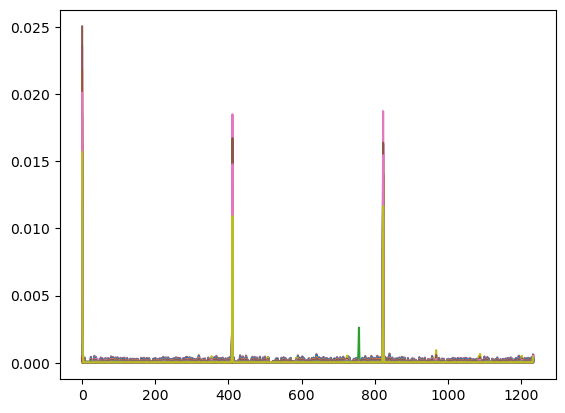

In [31]:
plt.plot(avg_fft)

In [65]:
kurtosis = np.array(kurtosis)
avg_fft = np.array(avg_fft)
rms = np.array(rms)
max_gradient = np.array(max_gradient)

In [59]:
max_gradient

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [55]:
rms.T.shape

(129, 1001)

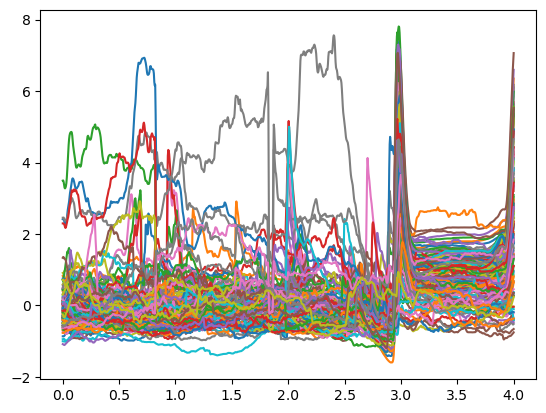

In [80]:
import matplotlib.pyplot as plt
time = np.arange(0, 4.0025, 1/raw.info['sfreq'])
plt.plot(time,kurtosis)

In [3]:
from pyprep.find_noisy_channels import NoisyChannels
test = NoisyChannels(raw)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


In [6]:
test.find_all_bads()

Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/246 [00:00<?,       ?it/s]


RANSAC done!


In [8]:
test._extra_info.keys()

dict_keys(['bad_by_deviation', 'bad_by_hf_noise', 'bad_by_correlation', 'bad_by_dropout', 'bad_by_ransac'])

In [19]:
import matplotlib.pyplot as plt
test._extra_info['bad_by_deviation']['robust_channel_deviations']

array([ 0.61719962,  1.4472698 ,  1.47310815, -0.36729263, -0.2473205 ,
       -0.83050617, -0.73963889,  4.19620996,  2.25439176,  1.20001994,
        0.40087461,  0.86866478, -0.36277407,  4.10213824,  2.74819221,
        2.00224302,  3.28214084,  0.78297187,  0.31312055,  0.07394419,
        3.83538339,  2.86835693,  0.72967731,  0.28215842,  1.25632141,
        1.70625462,  0.66952982, -0.72872178, -1.01483534, -1.00054706,
       -0.48789402, -1.00286998, -0.96519723, -1.17551352, -0.87684283,
       -0.94375427, -0.96345284, -0.72888965, -0.60382952, -0.97404447,
       -0.89719075, -0.67882331, -0.23159878, -0.46145775, -0.54998186,
       -0.09761425, -0.4434373 ,  0.45914453, -0.45935901, -0.32985445,
        0.97733809, -0.07412456, -0.54870766, -0.49749049, -0.58594496,
        0.38978345, -0.40245008,  1.2078162 ,  0.75737355,  0.62037369,
        0.44791368,  1.50068377,  1.14522856,  0.10649427,  0.48683605,
        0.43485598,  0.75643584,  1.19076172,  1.633055  , -0.29

In [48]:
scipy.signal.windows.boxcar(500, sym=True)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [32]:
a = avg_fft_calculation(window)
len(a)

129

In [36]:
avg_fft[:,]

array([   129, 308694])